# Kelly Criterion

## Cumulative Returns

Let $p_t$ be price at time $t$

Percentage Change at time $t$ can be defined like $$r_t = \frac{p_{t+1} - p_t}{p_t} = \frac{p_{t+1}}{p_t} - 1$$

Cumulative return at time $T$ can be defined like $$R_T = \prod_{t=1}^T (r_t + 1) = \frac{p_2}{p_1} \frac{p_3}{p_2}\cdots \frac{p_T}{p_{T-1}} = \frac{p_T}{p_1}$$

---
## Portfolio Outcomes

Let $g$ be a growth rate for $N$ times. Then, 

$$
\begin{align}
R_N &= R_0(1 + g)^N\\\\
1 + g &= \left(\frac{R_N}{R_0}\right)^{\frac{1}{N}}
\end{align}
$$

Let $L$ be the number of losses, and $W$ be the number of wins, we can also write 

$$
\begin{align}
R_N &= R_0(1 - l)^L(1 + l)^W\\\\
\frac{R_N}{R_0} &= (1 - l)^L(1 + l)^W\\\\
\left(\frac{R_N}{R_0}\right)^{\frac{1}{N}} &= (1 - l)^{\frac{L}{N}}(1 + l)^{\frac{W}{N}}\\\\
1 + g &= (1 - l)^{\frac{L}{N}}(1 + l)^{\frac{W}{N}}
\end{align}
$$



$$$$

Where $N$ is the number of wages, and $l$ is a drifting (loss or gain) per each wages.

---
## Optimization
Let $p$ be the probability of losing, and $1-p$ be the probability of wining. We can set $\frac{L}{N}\approx p$, and $\frac{W}{N}\approx 1 - p$

Consider 

$$
\begin{align}
\log[1 + g] &= \log\left[(1 - l)^{\frac{L}{N}}(1 + l)^{\frac{W}{N}}\right]\\\\
&\approx \log\left[(1 - l)^{p}(1 + l)^{(1-p)}\right]\\\\
&= \log\left[(1 - l)^{p}\right] + \log\left[(1 + l)^{(1-p)}\right]\\\\
&= p\log\left[(1 - l)\right] + (1-p)\log\left[(1 + l)\right]\\\\
\end{align}
$$

To maximize $g$ is setting $$\frac{\partial}{\partial l} \log[1 + g] = 0$$

Cosider:

$$
\begin{align}
0 &= \frac{\partial}{\partial l} \log[1 + g]\\\\
&= \frac{\partial\left( p\log\left[(1 - l)\right] + (1-p)\log\left[(1 + l)\right] \right)}{\partial l}\\\\
&=  p\frac{\partial}{\partial l}\log[1-l] + (1-p)\frac{\partial}{\partial l}\log[1 + l]\\\\
&=  p\frac{\partial \log[1-l]}{\partial (1-l)}\frac{\partial (1-l)}{\partial l} + (1-p)\frac{\partial \log[1 + l]}{\partial (1 + l)}\frac{\partial (1 + l)}{\partial l}\\\\
&= p\frac{1}{1-l}(-1) + (1 - p)\frac{1}{1+l}(1)\\\\
\end{align}
$$

Find optimal $l$ from the above equation:

$$
\begin{align}
0 &= \frac{-p}{1-l} + \frac{(1 - p)}{1+l}\\\\
\frac{p}{1-l} &= \frac{(1 - p)}{1+l}\\\\
p(1+l) &= (1-p)(1-l)\\\\
p + pl &= 1-l-p+pl\\\\
l &= 1-2p
\end{align}
$$

From the above optimal $l = 1-2p$, we plug this $l$ to $1 + g = (1 - l)^{p}(1 + l)^{(1-p)}$.

So,

$$
\begin{align}
1 + g &= (1 - l)^{p}(1 + l)^{(1-p)}\\\\
1 + g &= (1 - (1-2p))^{p}(1 + (1-2p))^{(1-p)}\\\\
1 + g &= (1 - 1 + 2p)^{p}(1 + 1 - 2p)^{(1-p)}\\\\
1 + g &= (2p)^{p}(2 - 2p)^{(1-p)}\\\\
1 + g &= 2^{p} p^{p}2^{(1-p)}(1 - p)^{(1-p)}\\\\
1 + g &= 2p^{p}(1 - p)^{(1-p)}\\\\
 g &= 2p^{p}(1 - p)^{(1-p)} - 1
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [2]:
l = np.linspace(0, 1, 101)
g = lambda p, l: (1 - l)**(p) * (1 + l)**(1-p) - 1

opt_l = lambda p: 1 - 2*p
opt_g = lambda p: 2 * p**p * (1-p)**(1-p) - 1

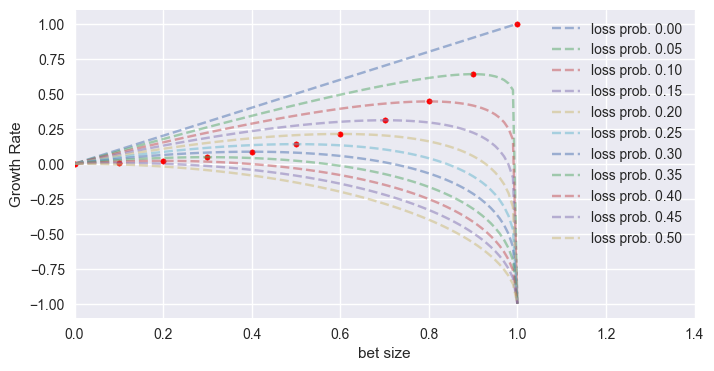

In [3]:
plt.figure(figsize=(8, 4))
for p_i in np.linspace(0, 0.5, 11):
    plt.plot(l, g(p_i, l), '--', alpha=0.5, label=f'loss prob. {p_i:.2f}')
    
for p_i in np.linspace(0, 0.5, 11):
    plt.scatter(opt_l(p_i), opt_g(p_i), c='r', s=15)


plt.ylabel('Growth Rate')
plt.xlabel('bet size')
plt.xlim(0, 1.4)
plt.legend(loc='best');

In [4]:
import yfinance as yf

In [5]:
goog = yf.Ticker('GOOG')

In [6]:
start = '2023-01-01'
end = '2024-01-01'
interval = '1d'

goog_df = goog.history(start=start, end=end, interval=interval)

In [7]:
goog_df['Diff'] = goog_df['Close'].diff()

In [8]:
win_amount = goog_df['Diff'][goog_df['Diff'] > 0].sum()
loss_amount = abs(goog_df['Diff'][goog_df['Diff'] < 0].sum())

In [9]:
loss_rate = loss_amount / (win_amount + loss_amount)

In [10]:
opt_l(loss_rate)

0.12461986513638101

In [11]:
opt_g(loss_rate)

0.00781566408190959

In [12]:
start = '2022-01-01'
end = '2024-01-01'
interval = '1d'

goog_df = goog.history(start=start, end=end, interval=interval)

In [13]:
def win_loss_rate_calculator(df):
    Diff = df['Close'].diff()
    win_amount = Diff[Diff > 0].sum()
    loss_amount = Diff[Diff < 0].sum()
    
    return win_amount, abs(loss_amount)

def optimal_bet_size(df):
    win_amount, loss_amount = win_loss_rate_calculator(df)
    loss_rate = loss_amount / (win_amount + loss_amount)
    opt_size = np.round(opt_l(loss_rate), 3) 
    opt_size = opt_size if opt_size > 0 else 0
    return opt_size

In [14]:
win_loss_rate_calculator(goog_df)

(469.6331024169922, 473.7627410888672)

In [15]:
optimal_bet_size(goog_df)

0

In [16]:
sizes = []
for i, df in enumerate(goog_df.rolling(252)):
    if i < 252:
        sizes.append(None)
    else:
        sizes.append(optimal_bet_size(df))

In [17]:
goog_df['size'] = sizes

In [18]:
goog_df['profits'] = goog_df['Close'].diff() * goog_df['size']

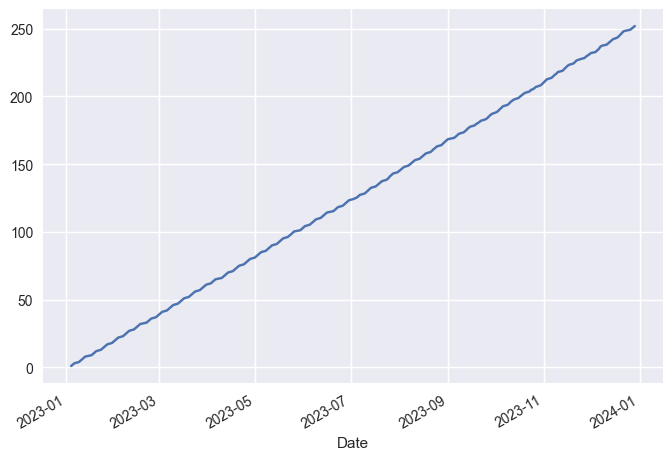

In [19]:
(1 + goog_df['profits']).cumsum().plot();

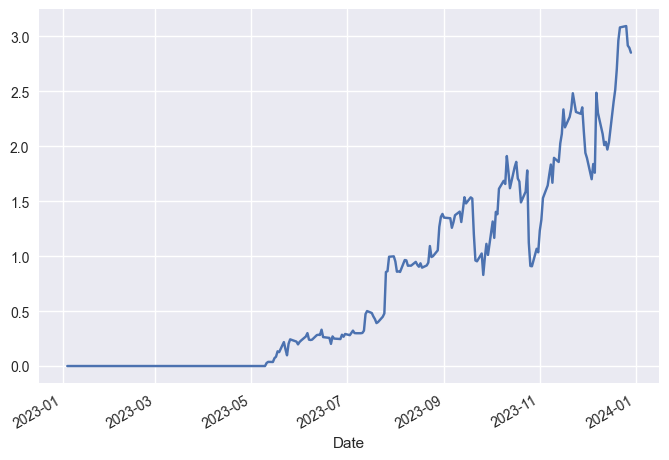

In [20]:
goog_df['profits'].cumsum().plot();

In [21]:
(1 + goog_df.loc['2023-01-03':, 'Close'].pct_change()).sum()

249.49844128080898

In [22]:
(1 + goog_df['profits']).sum()

251.85145414733887

In [23]:
goog_df['profits'].dropna().shape

(249,)

In [24]:
goog_df.loc['2023-01-03':, 'Close'].shape

(250,)